In [3]:
import numpy as np
import matplotlib.pyplot as plt

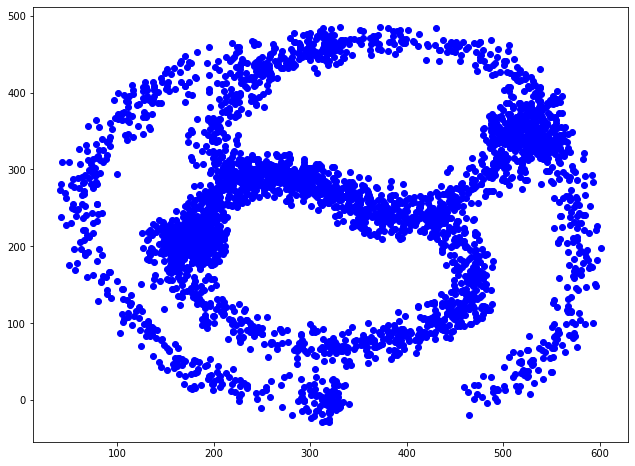

In [15]:
import pygame

points = np.empty((0,2), dtype='f')
    
c_radius = 2
c_color = (0,0,255)
c_thickness = 0 
jet_radius = 30
jet_thr = 0

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("data generator")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing and np.random.uniform(0,1)>jet_thr:        
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0,jet_radius)
        phi = np.random.uniform(0,2*np.pi)
        coord = [x+r*np.cos(phi), height-y+r*np.sin(phi)]
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),height-int(point[1])),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points[:,0],points[:,1],c="blue")
plt.show()

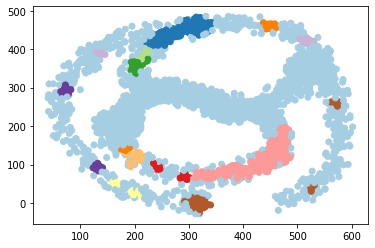

In [16]:
class DB_SCAN():
    
    def __init__(self, dataset, eps=20., min_samples=10):
        self.dataset = dataset
        self.eps = eps
        self.min_samples = min_samples
        self.n_clusters = 0
        self.clusters = {0:[]}
        self.visited = []
        self.labels = np.array([], dtype='i')
        self.fitted = False
        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
    def fit(self):
        for P in self.dataset:
            P = list(P)
            if P in self.visited: continue
            self.visited.append(P)
            neighbours = self.get_neighbours(P)
            if len(neighbours) < self.min_samples:
                self.clusters[0].append(P)
            else:
                self.expand_cluster(P)
        self.fitted = True
            
    def get_neighbours(self, P):
        return {tuple(Q) for Q in self.dataset if self.get_dist(Q,P) < self.eps}
    
    def expand_cluster(self, P):
        self.n_clusters += 1
        self.clusters[self.n_clusters] = [P]
        neighbours = self.get_neighbours(P)
        while neighbours:
            Q = list(neighbours.pop())
            if Q in self.visited: continue
            self.visited.append(Q)
            self.clusters[self.n_clusters].append(Q)
            if len(self.get_neighbours(Q)) > self.min_samples:
                neighbours = neighbours.union(self.get_neighbours(Q))
            if Q in self.clusters[0]:
                self.clusters[0].remove(Q)
                
    def get_labels(self):
        if not self.fitted: self.fit()
        labels = []
        for P in self.dataset:
            for i in range(self.n_clusters+1):
                if list(P) in self.clusters[i]:
                    labels.append(i)
                    break
        self.labels = np.array(labels, dtype='i')
        return self.labels

dbscan = DB_SCAN(points, eps=10, min_samples=10)

labels = dbscan.get_labels()

plt.figure()
plt.scatter(points[:,0], points[:,1], c=labels, cmap=plt.cm.Paired)
plt.show()

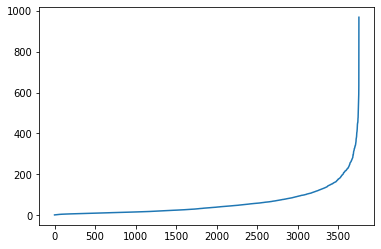

In [17]:
from sklearn.cluster import DBSCAN

m = 9
points_list = points.tolist()
points_count = len(points_list)
dists = []

def plot_with_eps(chosen_eps):
    labels = DBSCAN(eps = chosen_eps, min_samples = 5).fit_predict(points)
    plt.figure()
    plt.scatter(points[:,0], points[:,1], c = labels, cmap = plt.cm.Paired)
    plt.show()

for i in range(0, points_count):
    dists_sum = 0
    dists_list = []
    for j in range(0, points_count):
        if not i == j:
            x = points_list[i][0] - points_list[j][0]
            y = points_list[i][1] - points_list[j][1]
            dists_list.append(x**2 + y**2)
    dists_list.sort()
    for z in range(0, m):
        dists_sum += dists_list[z]
    dists_sum /= m
    dists.append(dists_sum)
dists.sort()
plt.figure()
plt.plot(dists)
plt.show()
    

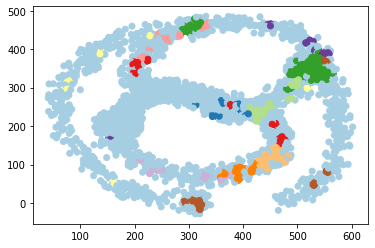

In [18]:
plot_with_eps(5)

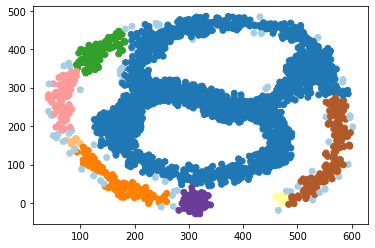

In [25]:
plot_with_eps(13)

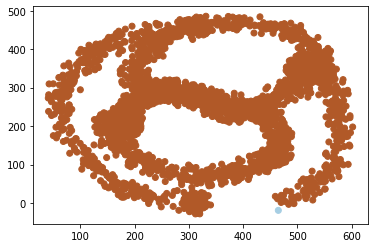

In [20]:
plot_with_eps(20)